<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 7 Section 2</p><br>

## 1. **Working with datetime data;** The object `myDate` contains the date and time. Based on this object answer the following questions and type the answer after your findings.

In [337]:
import pandas as pd
import datetime as dt
from pandas.tseries.holiday import USFederalHolidayCalendar
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
myDate = "2022-10-01 09:42:43"

a. Convert `myDate` into a datetime object with Iran time zone. Display the result.

In [64]:
myDate=pd.date_range(myDate, freq='H', periods=3,tz='Asia/Tehran')

In [51]:
myDate

DatetimeIndex(['2022-10-01 09:42:43+03:30', '2022-10-01 10:42:43+03:30',
               '2022-10-01 11:42:43+03:30'],
              dtype='datetime64[ns, Asia/Tehran]', freq='H')

b. Write your codes so that it displays the week day and also the month of `myDate`.

In [52]:
myDate.day_name()

Index(['Saturday', 'Saturday', 'Saturday'], dtype='object')

In [53]:
myDate.month_name()

Index(['October', 'October', 'October'], dtype='object')

c. What weekday and the month is it after exactly 100 years from `myDate`?

In [88]:
newDate = myDate +  pd.to_timedelta(100*365,unit='days')

In [82]:
newDate.month_name()

Index(['September', 'September', 'September'], dtype='object')

In [93]:
newDate.day_name()

Index(['Monday', 'Monday', 'Monday'], dtype='object')

d. Add two month with myDate and display the resulting date time.

In [99]:
newnewDate = myDate +  pd.to_timedelta(2*31,unit='days')

In [100]:
newnewDate

DatetimeIndex(['2022-12-02 09:42:43+03:30', '2022-12-02 10:42:43+03:30',
               '2022-12-02 11:42:43+03:30'],
              dtype='datetime64[ns, Asia/Tehran]', freq='H')

e. Suppose this homework is due on December 23, 2022 by 11.59PM. Compute and display how many seconds you got to complete this homework? Also compute the hours.

In [136]:
now = dt.datetime.now()
Due = dt.datetime(2022,12,23,11,59,59,0)
((Due - now).total_seconds()/60)/60

48.03779607277777

f. For the years `2021` & `2022`, count the number of weekends. Which year has the highest number of Weekends?

In [145]:
#2021
Weekends_2021 = len(pd.bdate_range(start="2021/01/01", end="2021/12/30", freq="C", weekmask="Sat Sun"))
#2022
Weekends_2022 = len(pd.bdate_range(start="2022/01/01", end="2022/12/30", freq="C", weekmask="Sat Sun"))
print(Weekends_2021,Weekends_2022)

104 104


g. What is the month(MM) and day(DD) on the `305`th day of the current year?

In [157]:
dt = pd.to_datetime('2022-01-01')
df = pd.DataFrame({'days': [305]})
df['date'] = df['days'].apply(lambda x: dt + pd.Timedelta(f'{x}D'))
df

,days,date
0,305,2022-11-02


h. The Date `2022-10-20` is formatted `YYYY-MM-DD`, format it into `MM-DD-YYYY`

In [178]:
Date = pd.to_datetime(pd.Series("2022-10-20"))
change_format = Date.dt.strftime('%M-%D-%Y')
change_format

0    00-10/20/22-2022
dtype: object

i. Find if the Date on the question above is the weekend or a weekday.

In [185]:
weekno = datetime.datetime.today().weekday()
if weekno < 5:
    print("Weekday")
else:  # 5 Sat, 6 Sun
    print("Weekend")

Weekday


## 2. **Walmart Sales Analysis:** load and read the dataset `walmart_sales.csv` and `walmart_fuel_prices.csv`.

We will follow the following data description when working with the above 2 datasets:

 * `index:` index is a default value of count
 * `Store:` Store is represented in number ID(1,2,3,4,...)
 * `Dept:` Dept is Department in each Store represented in number ID (1,2,3,4,...)
 * `Date:` Date is in YYYY-MM-DD char format - *needs to be converted into Date data type*
 * `Weekly_Sales:` Sales of a given Dept in a given Store for the Date
 * `Temperature:` Average temperature on the Date at given Store region
 * `Fuel_Price:` Cost of the Fuel on the given Date at a given Store
 * `IsHoliday:` Is the given Date a holiday Week? 

In [223]:
sales = pd.read_csv('walmart_sales.csv')
fuel_price = pd.read_csv('walmart_fuel_prices.csv')

In [224]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [225]:
fuel_price.head()

,index,Store,Date,Temperature,Fuel_Price,IsHoliday
0,1,1,2010-02-05,42.31,2.572,False
1,2,1,2010-02-12,38.51,2.548,True
2,3,1,2010-02-19,39.93,2.514,False
3,4,1,2010-02-26,46.63,2.561,False
4,5,1,2010-03-05,46.50,2.625,False


In [226]:
df = pd.merge(sales, fuel_price, on=['Date','IsHoliday','Store'])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,index,Temperature,Fuel_Price
0,1,1,2010-02-05,24924.50,False,1,42.31,2.572
1,1,2,2010-02-05,50605.27,False,1,42.31,2.572
2,1,3,2010-02-05,13740.12,False,1,42.31,2.572
3,1,4,2010-02-05,39954.04,False,1,42.31,2.572
4,1,5,2010-02-05,32229.38,False,1,42.31,2.572
...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,8151,58.85,3.882
421566,45,94,2012-10-26,5203.31,False,8151,58.85,3.882
421567,45,95,2012-10-26,56017.47,False,8151,58.85,3.882
421568,45,97,2012-10-26,6817.48,False,8151,58.85,3.882


 a. For both datasets, breakdown the `Date` column and create additional new columns `Year`, `Month`, and `Day`. You should now have additional 3 new columns in your both dataset. Report only the column names for both the dataset.

In [215]:
def Add_column(data_frame, column):
    data_frame[[column]] = data_frame[[column]].apply(pd.to_datetime)
    data_frame['day'] = data_frame['Date'].dt.day
    data_frame['month'] = data_frame['Date'].dt.month
    data_frame['year'] = data_frame['Date'].dt.year

In [381]:
Add_column(sales, 'Date')
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday,day,month,year
0,1,1,2010-02-05,24924.50,False,5,2,2010
1,1,1,2010-02-12,46039.49,True,12,2,2010
2,1,1,2010-02-19,41595.55,False,19,2,2010
3,1,1,2010-02-26,19403.54,False,26,2,2010
4,1,1,2010-03-05,21827.90,False,5,3,2010
...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,28,9,2012
421566,45,98,2012-10-05,628.10,False,5,10,2012
421567,45,98,2012-10-12,1061.02,False,12,10,2012
421568,45,98,2012-10-19,760.01,False,19,10,2012


In [382]:
Add_column(fuel_price, 'Date')
fuel_price

,index,Store,Date,Temperature,Fuel_Price,IsHoliday,day,month,year
0,1,1,2010-02-05,42.31,2.572,False,5,2,2010
1,2,1,2010-02-12,38.51,2.548,True,12,2,2010
2,3,1,2010-02-19,39.93,2.514,False,19,2,2010
3,4,1,2010-02-26,46.63,2.561,False,26,2,2010
4,5,1,2010-03-05,46.50,2.625,False,5,3,2010
...,...,...,...,...,...,...,...,...,...
8185,8186,45,2013-06-28,76.05,3.639,False,28,6,2013
8186,8187,45,2013-07-05,77.50,3.614,False,5,7,2013
8187,8188,45,2013-07-12,79.37,3.614,False,12,7,2013
8188,8189,45,2013-07-19,82.84,3.737,False,19,7,2013


In [228]:
Add_column(df, 'Date')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,index,Temperature,Fuel_Price,day,month,year
0,1,1,2010-02-05,24924.50,False,1,42.31,2.572,5,2,2010
1,1,2,2010-02-05,50605.27,False,1,42.31,2.572,5,2,2010
2,1,3,2010-02-05,13740.12,False,1,42.31,2.572,5,2,2010
3,1,4,2010-02-05,39954.04,False,1,42.31,2.572,5,2,2010
4,1,5,2010-02-05,32229.38,False,1,42.31,2.572,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,8151,58.85,3.882,26,10,2012
421566,45,94,2012-10-26,5203.31,False,8151,58.85,3.882,26,10,2012
421567,45,95,2012-10-26,56017.47,False,8151,58.85,3.882,26,10,2012
421568,45,97,2012-10-26,6817.48,False,8151,58.85,3.882,26,10,2012


b. In `walmart_sales`: which `Month(s)` of `Year` have the highest `Weekly_Sales`? Report the Year, Month, Store, and Dept.

In [243]:
sales.loc[sales['Weekly_Sales'].idxmax()]

Store                            10
Dept                             72
Date            2010-11-26 00:00:00
Weekly_Sales              693099.36
IsHoliday                      True
day                              26
month                            11
year                           2010
Name: 95373, dtype: object

c. In `walmart_sales`: calculate the average monthly sales by Department for each Store. Which Store(s) has the highest average monthly sales on the department(s)? Report the Store, Department, Date.

In [269]:
sales.groupby(['Store', 'Dept','Date'])['Weekly_Sales'].mean().sort_values(ascending=False)

Store  Dept  Date      
10     72    2010-11-26    693099.36
35     72    2011-11-25    649770.18
10     72    2011-11-25    630999.19
35     72    2010-11-26    627962.93
14     72    2010-11-26    474330.10
                             ...    
28     32    2011-03-25     -1321.48
16     47    2012-03-09     -1699.00
45     47    2010-02-26     -1750.00
35     47    2011-09-02     -3924.00
28     6     2010-10-08     -4988.94
Name: Weekly_Sales, Length: 421570, dtype: float64

d. In `walmart_sales`: which month of year `2011` has the highest overall sales by Store? Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. After that do the same for `2012`. Does the highest sales per month fall on the same holiday for both years? Report your findings for both year.

In [296]:
def highest_sale(year):
    sales1 = sales[sales.year == year]
    sales1 = sales1.groupby(['month'])['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()
    return sales1.head(1)['month']

In [297]:
highest_sale(2011)

0    12
Name: month, dtype: int64

In [298]:
highest_sale(2012)

0    6
Name: month, dtype: int64

 e. In `walmart_sales`: report the lowest sales per month for the year `2011` for `IsHoliday == TRUE`. Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Do the same for `2012` and report if the lowest sales are on the same month.

In [321]:
def lowest_sale(year):
    sales1 = sales[sales.year == 2011]
    sales1 = sales1[sales1.IsHoliday == True]
    sales1 = sales1.groupby(['month'])['Weekly_Sales'].sum().sort_values(ascending=True).reset_index()
    return sales1.head(1)['month']

In [322]:
lowest_sale(2011)

0    12
Name: month, dtype: int64

In [323]:
lowest_sale(2012)

0    12
Name: month, dtype: int64

f. In `walmart_sales`: We have 45 unique stores. Generate a nice plot on the total sales by store for the year `2012`. Report the Store number.

Text(0.5, 0, 'Stores')

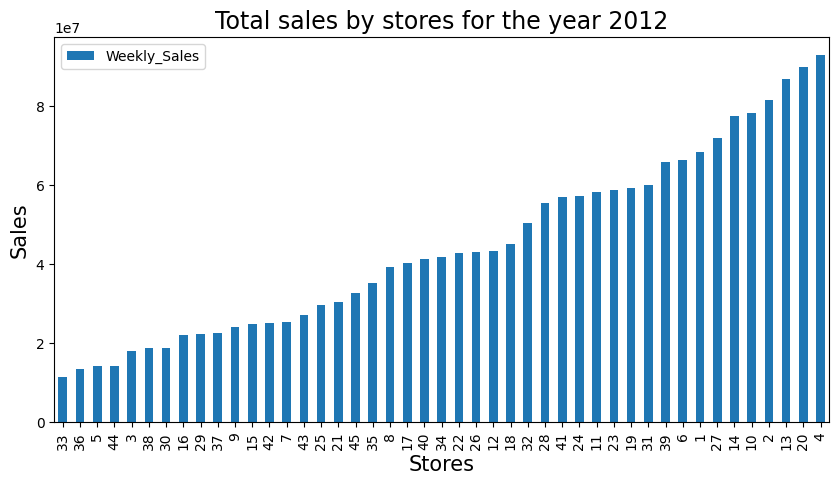

In [369]:
sales1 = sales[sales.year == 2012]
sales1 = sales1.groupby(['Store'])['Weekly_Sales'].sum().sort_values().reset_index()
sales1.plot(kind='bar', x='Store', y='Weekly_Sales',figsize=(10,5))
plt.title('Total sales by stores for the year 2012', fontsize=17)
plt.ylabel('Sales', fontsize=15)
plt.xlabel('Stores', fontsize=15)


g. In `walmart_fuel_prices`: For the year `2011` do you think higher the `temperature` relates to higher `fuel price`? Support your answer with a nice plot.

In [387]:
cor = fuel_price[fuel_price.year == 2011]
cor = cor[['Temperature','Fuel_Price']].corr()
cor

,Temperature,Fuel_Price
Temperature,1.00000,0.48825
Fuel_Price,0.48825,1.00000


<AxesSubplot: >

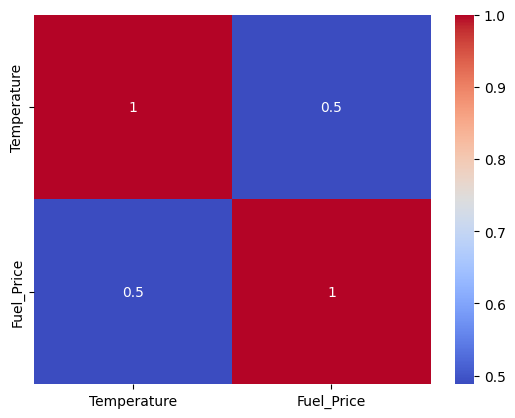

In [388]:
sns.heatmap(cor, annot = True, fmt='.1g',cmap= 'coolwarm')

 h. In `walmart_fuel_prices`: For the year `2010` which `Store` had the lowest Fuel Price? Report the `month` and `temperature`. On the same `month`, what was the highest fuel price for the store? Report the difference.

In [411]:
new = fuel_price[fuel_price.year == 2010]
new.groupby(['Store'])['Fuel_Price'].mean().reset_index()
new.head()

,index,Store,Date,Temperature,Fuel_Price,IsHoliday,day,month,year
0,1,1,2010-02-05,42.31,2.572,False,5,2,2010
1,2,1,2010-02-12,38.51,2.548,True,12,2,2010
2,3,1,2010-02-19,39.93,2.514,False,19,2,2010
3,4,1,2010-02-26,46.63,2.561,False,26,2,2010
4,5,1,2010-03-05,46.50,2.625,False,5,3,2010


In [406]:

lowest= new.groupby(['Store'])['Fuel_Price'].mean().min()
highest = new.groupby(['Store'])['Fuel_Price'].mean().max()
highest- lowest 


0.40474999999999994

i. In `walmart_fuel_prices`: For the `IsHoliday == TRUE`, which month has the lowest `Fuel Price` for the year `2012`? name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Also report month of the highest fuel price and name of the holiday.

In [20]:
# TODO

## 3. **COVID19 Time Series Data:**

<br/>
Download the data from
<a target='_blank' href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv">[github link]</a>
(https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv) 

<br/>
<br/>
The link above contains a time-series data for COVID-19 confirmed cases in the US. Limit the data to only use `New York State` and please answer the following questions:



a. What is the total confirmed cases in Nebraska as of October 30th 2020 as per the dataset?


In [21]:
# TODO

b. On what date has the highest confirmed cases? Demonstrate using a suitable graph for all the available data.


In [22]:
# TODO

c. Which County has the highest daily confirmed cases? Report both the County name and the date


In [23]:
# TODO

d. Identify two countries that have top total confirmed cases. Generate a time series plot of daily confirm cases for these two countries.


In [24]:
# TODO

e. Show the total confirmed cases for all the locations in an interactive world map (hint: you may use `leaflet` package in `python`.


In [ ]:
# TODO